# EE 538: Low-Noise Analog Circuit Design
## Spring 2021
## Instructor: Jason Silver

## EE 538 basics I

 - Instructor
     - Jason Silver
     - Office hours Thursdays 6 - 7pm
 - Teaching assistant
     - Alan Logan
     - Office hours Fridays 6 - 7pm
 - Web page: [EE 538 Spring 2021 (Canvas)](https://canvas.uw.edu/courses/1448967)
     - Access assignments, grades, and solutions
 - Slack
     - [EE 538 Spring 2021 Slack workspace](https://join.slack.com/t/uwlnad2021/shared_invite/zt-objv9s4w-5T1Tx_YIKWhrjI4FqgFWJQ)
     - Use Slack to ask questions about assignments and projects
     - Participation in online discussion benefits everyone
     
         

## EE 538 basics II

 - To succeed in this course, you should have an understanding of
     - Elementary circuit theory
        - KVL, KCL, Thevenin equivalent circuits, Laplace/Fourier transforms
     - Semiconductor device operation and circuit analysis 
         - Diodes, FETs, BJTs
     - Basic linear systems
         - Frequency response, poles, zeros, Bode plots
     - Circuit simulation with some flavor of SPICE (__S__imulation __P__rogram with __I__ntegrated __C__ircuit __E__mphasis)
 
         
         

## About your instructor

 - PhD from UW EE in 2015
     - Low power integrated circuit (IC) design for bioelectrical interfaces
         - EEG, EMG, neural recording
     - Focus on optimizing for power efficiency
 - 12 years experience designing ICs and systems for academia and industry
     - Mixed-signal design for biomedical applications
 - Current (full-time) role
     - Director of Hardware Engineering at Curi Bio
         - Formerly housed in UW CoMotion startup incubator (Fluke Hall)
         - Instrumentation for *in vitro* cell studies

## Course breakdown

- Weekly assignments (40%)
    - Typically assigned Saturday, submitted online the Sunday of the following week
- Midterm exam (20%)
    - Single exam covering approximately half of the course material
    - "Take-home" format, submitted online
- Design project (40%)
    - Analog/mixed-signal design project with Python/Jupyter Notebooks and LTspice
    - Optimization for performance, power, cost
    - Topic TBD

## Course learning goals

 - Develop deeper understanding of noise processes and the mathematical treatment of noise
 - Understand the effects of noise on analog circuit and system performance, and how to minimize noise while balancing power, cost, and circuit complexity
 - Utilize a systematic approach to circuit/system design
    - Focus on analysis/scripting early in the design process
    - Employ SPICE to validate calculations and assumptions

## Course topics

 - Fundamentals of random noise processes
    - Thermal noise
    - Shot noise
    - $1/f$ noise
 - Amplifier noise model
    - Input-referred noise sources
    - Noise figure
    - Signal-to-noise ratio (SNR)
    - Noise in feedback circuits
 - Transistor noise
    - BJT noise model
    - MOSFET noise model
    - JFET noise model
 - Nonlinearity/distortion
 - Sensor noise
 - Low-noise design
    - Chopper modulation
    - Auto-zeroing/correlated double sampling 

## Software and CAD 

 - We will use LTspice for circuit simulation
     - [LTSpice IV Getting Started](https://www.analog.com/media/en/simulation-models/spice-models/LTspiceGettingStartedGuide.pdf?modelType=spice-models)
     - You may use other tools “at your own risk”
 - Design, data analysis, and results plotting using Python/Jupyter Notebooks
    - Design scripts iterable and reusable
    - More flexible than LTspice native plotting functions
    - Lecture examples created using Python/Jupyter Notebooks

## SPICE design methodology

 - SPICE is a numerical simulation tool that enables you to evaluate circuit ideas
 - General rule: Don't simulate something you don't already (mostly) understand
    - SPICE is for verification only!
 - Neither analytical nor simulation models provide a complete picture of reality
     - Understanding model limitations is crucial to building successful circuits and systems

## Jupyter Hub / Jupyter Notebooks

 - Lecture notes and assignments will be available as Jupyter notebooks (and PDFs) through Jupyter Hub
 - Jupyter Hub enables execution of Python code without the need for installation/maintenance of packages, etc
 - Lecture notes/slides will be made available in student directories prior to lecture
 - [EE538 Jupyter Hub Server](https://rttl.axdd.s.uw.edu/2020-autumn-e-e-538-a)
 - Please log out of the server when you're not using it!
 

## Announcements

 - Assignment 1 posted on JupyterHub
     - Due Sunday, April 11

## Week 1

 - Low Noise Electronic System Design: Chapter 1 (Motchenbacher) 
 - Electronic Noise and Fluctuation in Solids: Chapter 1 (Kogan)
 - Thermal Agitation of Electric Charge in Conductors (Nyquist)

## Overview

 - Today...
     - Random variables
     - Thermal noise
     - Noise bandwidth
     - Shot noise 
     - Flicker noise

## Python packages/modules

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy import integrate
#%matplotlib notebook

mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 'large'

def plot_xy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.plot(x, y, 'b')
    ax.grid()
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xy2(x1, y1, x1label, y1label, x2, y2, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].plot(x1, y1, 'b')
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x2, y2, 'b')
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    fig.align_ylabels(ax[:])

def plot_xy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].plot(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].plot(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].plot(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()
    
def plot_logxy3(x, y1, y2, y3, xlabel, y1label, y2label, y3label):
    fig, ax = plt.subplots(3, figsize=(10.0,7.5))
    
    ax[0].semilogx(x, y1)
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x, y2)
    ax[1].set_ylabel(y2label)
    ax[1].grid()
    
    ax[2].semilogx(x, y3)  
    ax[2].set_ylabel(y3label)
    ax[2].set_xlabel(xlabel)
    ax[2].grid()

def plot_logxy(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.semilogx(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_loglog(x, y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(10.0, 7.5))
    ax.loglog(x, y, 'b')
    ax.grid();
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def plot_xlogy(x, y, xlabel, ylabel, ymin, ymax):
    fig, ax = plt.subplots(figsize=(10.0, 7.5));
    ax.semilogy(x, y, 'b');
    ax.grid();
    ax.set_xlabel(xlabel);
    ax.set_ylabel(ylabel);
    ax.set_ylim(ymin,ymax)
    
def plot_logxy2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].semilogx(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].semilogx(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])

def plot_loglog2(x1, y1, x2, y2, x1label, y1label, x2label, y2label):
    fig, ax = plt.subplots(2, figsize = (10.0, 7.5));
    ax[0].loglog(x1, y1, 'b');
    ax[0].set_ylabel(y1label)
    ax[0].grid()
    
    ax[1].loglog(x2, y2, 'b');
    ax[1].set_xlabel(x1label)
    ax[1].set_xlabel(x2label);
    ax[1].set_ylabel(y2label);
    ax[1].grid();
    
    fig.align_ylabels(ax[:])
    
def plot_noise_bandwidth(f, mag):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].semilogx(f, RC_mag)
    ax[0].set_xscale("log")
    ax[0].set_xlim(f[0], f[-1])
    ax[0].set_xticks(np.logspace(0.1,4,5))
    ax[0].set_xticklabels([])
    ax[0].set_ylabel('Magnitude [V/V]')
    ax[0].set_title('Equivalent Noise Bandwidth')
    ax[0].grid()

    ax[1].hlines(1, 0, f_enb, color='tab:blue')
    ax[1].hlines(0, f_enb, f[-1], color='tab:blue')
    ax[1].vlines(f_enb, 0, 1, color='tab:blue')
    ax[1].set_xlim(f[0], f[-1])
    ax[1].set_xscale("log")
    ax[1].set_xticks(np.logspace(0.1,4,5))
    ax[1].set_xticklabels([r'$10^0$',r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$'])
    ax[1].set_ylabel('Magnitude [V/V]')
    ax[1].set_xlabel('Frequency [Hz]')
    ax[1].grid()

def read_ltspice_ac(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        z = []
        next(data) # skip header line
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            complex = p[1].split(",")
            y.append(float(complex[0]))
            z.append(float(complex[1]))

    return x, y, z
    
def noise_hist(vnoise, vn_rms, bins):
    fig = plt.figure( figsize=(10.0,7.5) )
    vn_norm = vnoise/vn_rms
    ax = fig.add_subplot(111)
    n, bins, rectangles = ax.hist(vn_norm, bins, density=True, range=(-3, 3),
                                 color='b')
    ax.set_xlabel(r'Sample Voltage [$v_{n(rms)}$]')
    ax.set_ylabel('Probability Density')
    ax.grid()
    fig.canvas.draw()
    
def plot_flicker_vs_white_noise(f, e_n_tot, e_n_w, vn_rms, vn_w_rms):
    fig, ax = plt.subplots(2, figsize=(10.0,7.5))
    ax[0].loglog(f, 1e9*(e_n_tot), label=r'1/f + white noise')
    ax[0].loglog(f, 1e9*(e_n_w*np.ones(np.shape(f))), 
                 color='tab:red', label = 'white noise only')
    ax[0].set_ylabel(r'$e_n$ $[nV/\sqrt{Hz}]$')
    ax[0].grid()

    # Plot the RMS noise as a function of bandwidth
    ax[1].semilogx(f, 1e6*vn_rms)
    ax[1].semilogx(f, 1e6*vn_w_rms, color='tab:red')
    ax[1].set_ylabel(r'RMS noise $[\mu V]$')
    ax[1].set_xlabel(r'Frequency, Bandwidth [Hz]')
    ax[1].grid()
    fig.align_ylabels(ax[:])

    ax[0].legend()
    ax[0].legend(loc='upper center', ncol=2, fancybox=True, 
               shadow=True, bbox_to_anchor=(0.5,1.3) )   

In [3]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

# Lecture 1 - Noise Fundamentals

## Noise

 - For most applications, the ultimate limit of the detectability of weak signals is determined by random noise
 
 - We generally define noise as any unwanted “signals” that obscure or corrupt the desired signal
 
 - Some forms of noise are unavoidable and can only be overcome by averaging or bandwidth limiting (i.e. filtering)
 
 - Other forms can be reduced or eliminated by circuit/system architecture (e.g. ground loops and other common-mode interference)
 
 - A significant amount of design effort in signal conditioning is devoted to reducing/managing noise



## Random noise

 - Although noise can take on many definitions, the term typically refers to random noise due to fundamental physical processes (e.g. the random motion of charge in conductors)
 
 -  In this sense, noise is a stochastic (random) process. The random nature of noise is due to the fact that the thermal motion and quantum transitions of particles (i.e. electrons and atoms) in solids are random
 
 - Some examples of random noise are:
     - __Johnson noise__: Random voltage noise caused by thermal fluctuations in a conductor
     - __Shot noise__: Random statistical fluctuations in current caused by the discrete nature of charge
     - __Flicker noise ($1/f$)__: Random noise, caused by a variety of factors, characterized by an increase in power spectral density at low frequencies
     - __Burst noise__: Low-frequency noise typically seen as random jumps between two signal levels
 - In this course we will focus on the first three types, which tend to be the dominant sources of noise in resistors and transistors

## Random processes

 - A random process, which can be continuous-time (CT) or discrete-time (DT), is a function that maps each outcome of a probabalistic experiment to a CT or DT signal
 
 - The statistical characteristics of a random process are nonrandom quantities, which in principle can be measured by a corresponding averaging of the random quantity
  
 

## Mean, variance, and autocorrelation

 - The __mean__, or, expected value, of random variable $x(t)$, typically denoted $\overline{x(t)}$ or $\langle x(t) \rangle$, is the arithmetic mean of a large number of independent samples of $x(t)$
 
\begin{equation}
\mu_x = E[x(t)] = \overline{x(t)} =\int_{-\infty}^{+\infty}x(t)w(x)dx
\end{equation}

 - where $w(x)$ is the **probability density function** of $x$. Assuming an appropriately long measurement time $T$ (and a property called *ergodicity*), the mean can also be expresssed as
 
\begin{equation}
\mu_x = \overline{x(t)} =  \lim_{T \to \infty} \dfrac{1}{2T}\int_{-T}^{T} x(t) dt
\end{equation}

 - Let $\delta x = x(t) - \overline{x}$ be defined as the **fluctuation** of $x(t)$.  The __variance__ (also called the *second-order moment*) is the expected value of the fluctuation squared

\begin{equation}
\text{Var}(x) = \sigma_x^2 = \langle (\delta x)^2 \rangle = \int_{-\infty}^{+\infty}(\delta x)^2w(x)dx
\end{equation}

- **Autocorrelation** is the correlation of a signal or process with itself at *different time points*
 
\begin{equation}
R_{xx}(\tau) = E[x(t)x(t+\tau)] = \lim_{T\to\infty}\dfrac{1}{2T}\int_{-T}^{T}x(t)x(t+\tau)dt 
\end{equation}

 - Note that the autocorrelation function only depends on the time difference $\tau$, not on the specific point in time at which it is evaluated
 
 - In a sense, the autocorrelation function can be thought to describe the memory a random process retains of its previous values

## Gaussian random variables

 - The general form of the probability density function for a Gaussian random variable is
 
\begin{equation}
w(x) = \dfrac{1}{\sigma_x\sqrt{2\pi}} e^{-\frac{1}{2}\left( \frac{x-\mu_x}{\sigma_x}\right)^2}
\end{equation}

 - $\mu_x$ is the mean or expected value of the distribution, and $\sigma_x$ is the square root of the variance, or **standard deviation**
 
 - Gaussian distributions arise when a random quantity $x(t)$ is the sum of many ($N>>1$) independent and identically distributed random quantities (regardless of whether the individual distributions are Gaussian)
 
 - The **central limit theorem** states that the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable whose distribution converges to a normal distribution as the number of samples increases
 
 - Essentially, no matter what distribution you begin with, the sum (or average) of the outcomes of many trials will be approximately Gaussian
 
 - Additionally, and conveniently, a Gaussian variable is *entirely described* by its mean and variance

 - A Gaussian probability distribution exhibits the stereotypical "bell" curve (although many other types of distributions are also bell-shaped)
 
 - A key characteristic of a Gaussian distribution is that large fluctuations (i.e. deviations from the mean) are much less probable than small ones

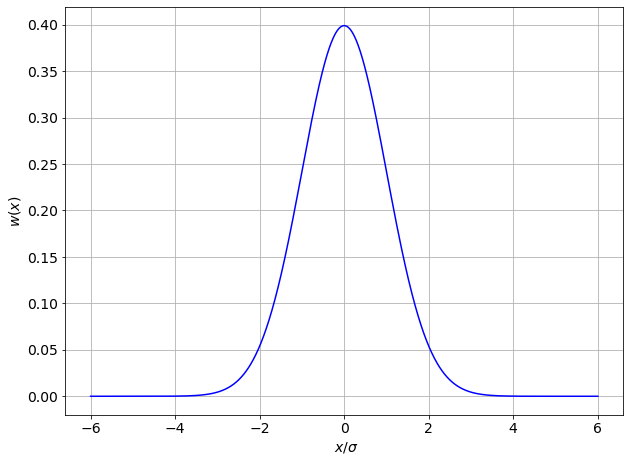

In [4]:
sigma = 1
x = np.linspace(-6*sigma, 6*sigma, 12000) 
normal_dist = (1/np.sqrt(2*np.pi))*np.exp(-np.power(x,2)/2/sigma**2)
plot_xy(x/sigma, normal_dist, r' $x/\sigma$', r'$w(x)$')

 - We can use the distribution function to predict the percentage of measurements of a noise process that will fall within in a given amplitude range

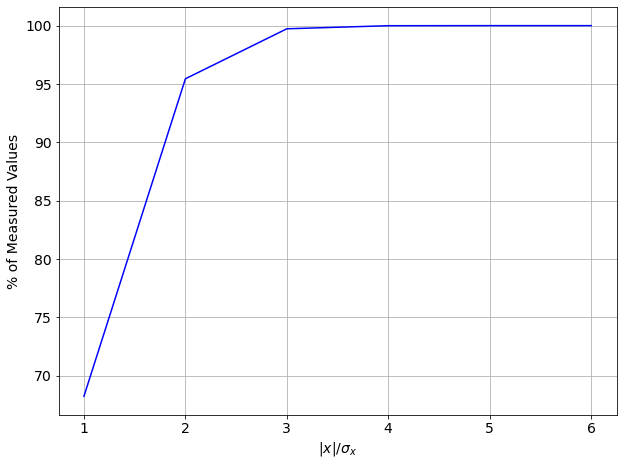

In [5]:
val_probability = []
int_range = [1, 2, 3, 4, 5, 6]
for rng in int_range:
    p = integrate.cumtrapz(normal_dist[int(x.size/2)-rng*1000:int(x.size/2)+rng*1000], 
                           x[int(x.size/2)-rng*1000:int(x.size/2)+rng*1000], initial=0)
    val_probability.append(p[-1])
val_probability = np.asarray(val_probability)
plot_xy(int_range, val_probability*100, r'$|x|/\sigma_x$', '% of Measured Values')

## Spectral density

 - If we take $x(t)$ to be the instantaneous voltage across (or current through) a unit resistor, we refer to $x^2(t)$ as the *instantaneous power* in $x(t)$. The *expected value* of the instantaneous power is given by
 
\begin{equation}
E[x^2(t)] = \sigma_x^2 = R_{xx}(0) = \dfrac{1}{2\pi}\int_{-\infty}^{\infty}S_{xx}(f)df 
\end{equation}
 
 - $S_{xx}(f)$ is the Fourier transform of the autocorrelation function $R_{xx}(\tau)$. For a given realization of $x(t)$, $S_{xx}$ represents the time-average power of the signal, and is referred to as the **power spectral density** of $x(t)$
 
 - If we focus on a finite frequency band $\Delta f$, we can express the expected power of $x(t)$ over a finite bandwidth $\Delta f$ as
 
\begin{equation}
E[x_{\Delta f}^2(t)] = \sigma_{x_{\Delta f}}^2 =  \dfrac{1}{2\pi}\int_{\Delta f}S_{xx}(f)df 
\end{equation}
 
 - This property is useful in that it allows us to assess the (statistical) time-domain properties of a noise process by integrating its spectral density over the bandwidth of interest


## Noise color

 - __White noise__: Equal power at all frequencies (i.e. spectral density invariant with frequency)
 
     - So called based on an analogy with white light, though somewhat of a misnomer as white light has equal energy per wavelength (not frequency)
     - Thermal and shot noise are examples of white noise
 - __Pink noise__: Power spectral density is inversely proportional to frequency ($1/f^\gamma$)
     - In electronics, often referred to as "flicker" noise, a termed coined by Walter Schottky in reference to emission of light with a $1/f^\gamma$ characteristic ("flicker effect")
     - Observed in many natural systems, including biological ones
 - __Red (or Brown) noise__: Power spectral density inversely proportional to the square of frequency ($1/f^2$)
     - The result of Brownian motion, the random motion of particles suspended in a liquid or gas at thermal equilibrium
     - As sound, a low roar resembling a waterfall or heavy rainfall

## Johnson-Nyquist (thermal) noise

 - In his landmark 1928 paper, Harry Nyquist showed that the average power, due to thermal fluctuations of electrons, transferred between two identical conductors in thermal equilibrium with each other in a bandwidth of $\Delta f$ is given by
 
\begin{equation}
N_t =  kT \Delta f \: W/Hz
\end{equation}

 - where $k = 1.38E^{-23} J/K $ is Boltzmann's constant and $T$ is temperature in Kelvin 
 
 - The current induced by the noise voltage (which we'll call $e_n$) of either conductor is obtained by dividing $e_n$ by the total resistance of $2R$. The resulting power is the square of the current multiplied by $R$:
 
\begin{equation}
N_t = \dfrac{e_n^2}{R^2}\cdot R = kT\Delta f
\end{equation}

 - The *power spectral density* of the noise voltage due to each resistor is thus
 
\begin{equation}
\boxed{e_n^2 = 4kTR\Delta f}
\end{equation}

 - A conductor unconnected to anything generates a noise voltage across its terminals due to the kinetic energy of electrons
 
 - Thermal noise is a type of white noise, and thus has the same power in every $1Hz$ bandwidth of frequency ($\Delta f = 1 Hz$).  
 
 - Another way of stating this is that the autocorrelation function of thermal/white noise is an impulse function (i.e. noise values at different points in time are uncorrelated)

<center><img src="img/resistor_noise.png" width=250 /></center>


$$ e_n = \sqrt{4kTR} \; V/\sqrt{Hz} $$

$$ e_n^2 = 4kTR \; V^2/Hz $$


## RMS noise

<center><img src="img/rms_noise.png" width=800 /></center>

 - The $rms$ noise is the voltage we would measure if we connected the resistor to an ideal (noiseless) amplifier and bandpass filter and looked at the output on a spectrum analyzer
 
 - For a resistor with resistance $R$ and a bandwidth of $\Delta f$, this is given by
 
\begin{equation}
v_{n(rms)} = \sigma_{v_n} = e_n \sqrt{\Delta f} = \sqrt{4kTR \Delta f}
\end{equation}
 
 - This definition of $rms$ noise tells us that thermal noise *increases as the square root of bandwidth*
 
 - Note that this does not say anything about the voltage we measure at any given time instant, only its $rms$ value (i.e. its standard deviation)

## Thermal noise density

 - As an example, a $1k\Omega$ resistor at room temperature ($25C$) has an open-circuit voltage noise density $e_n \approx 4nV/\sqrt{Hz} $

In [6]:
k = 1.38e-23                 # Boltzmann constant, J/K
T = 300                      # room temperature (27C) in Kelvin
R_1k = 1e3                     # 10,000 ohm resistor
f = np.logspace(0,7,num=700) # 1 Hz to 10 MHz
en_1k =np.sqrt(4*k*T*R_1k)*np.ones(np.shape(f)) # flat PSD
en_1k_2 = en_1k**2         # mean-square noise

 - To calculate the $rms$ noise over a given bandwidth $\Delta f$, we integrate the mean-square noise $e_n^2$ over that bandwidth and take the square root

In [7]:
vn_rms = []
for fbw in f:
    vn_rms.append(np.sqrt(4*k*T*R_1k*fbw))
vn_rms = np.asarray(vn_rms)

 - Here we're plotting the voltage noise density, mean square noise density (also called the power spectral density), and the $rms$ voltage noise as a function of frequency/bandwidth

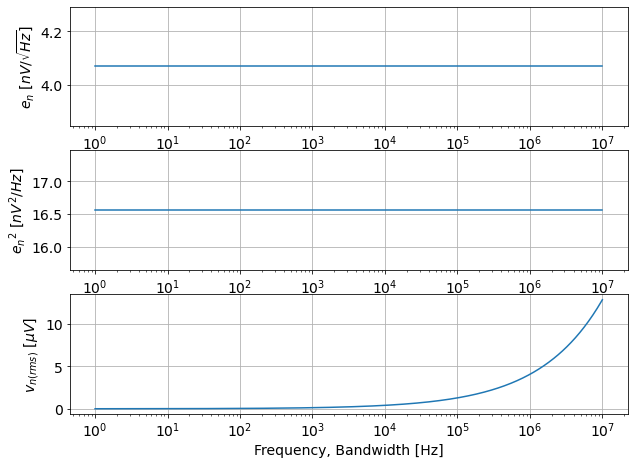

In [8]:
plot_logxy3(f, 1e9*en_1k, 1e9**2*en_1k_2, 1e6*vn_rms,
        'Frequency, Bandwidth [Hz]', r'${e_n}$ [${nV}/\sqrt{Hz}$]', 
        r'${e_n}^2$ [${nV}^2/Hz$]', r'$v_{n(rms)}$ [$\mu V$]' )

 - Over a $10 \:\text{kHz}$ bandwidth, the $1\text{k}\Omega$ resistor generates an $rms$ voltage noise of $\sim0.4\mu V$
 - For a $10\:\text{MHz}$ bandwidth, the $rms$ voltage noise is about $13\mu V$

## Short-circuit noise current

 - A resistor's voltage noise can be converted to a noise current by shorting the two terminals (Norton equivalent circuit)
 
 - The bidrectional current symbol just means that the noise current can flow in either direction (random variable)
 
 - Thermal *current* noise density decreases with resistance magnitude, and is specified in units of $A/\sqrt{Hz}$
  
 - The short-circuit noise current is a alternative representation of the resistor's noise, and still represents the *same noise mechanism*
 

<center><img src="img/resistor_current_noise.png" height=400 /></center>


$$ i_n = \sqrt{4kT/R} \; A/\sqrt{Hz} $$

$$ e_n = i_n \cdot R = \sqrt{4kTR} \; V/\sqrt{Hz} $$

$$ i_n^2 = 4kT/R \; A^2/Hz $$


## Combining noise sources

- Because we deal with $rms$ values of noise voltages and currents, our treatment of them in circuits is slightly different from that of other sources

- $rms$ sources that are uncorrelated (i.e. independent of each other) cannot be added together directly, but must be added as *mean-square* quantities

- An intuitive explanation for this is that different random noise sources will sometimes add, sometimes subtract, resulting in a total noise that is not a direct sum

- To combine two uncorrelated noise sources we compute the square-root of the sum of their mean-square values

<center><img src="img/multiple_noise_currents.png" height=400 /></center>


$$ i_{n1} = \sqrt{4kT/R_1} \; A/\sqrt{Hz} $$

$$ i_{n2} = \sqrt{4kT/R_2} \; A/\sqrt{Hz} $$

$$ i_{n,tot}^2 =  i_{n1}^2 + i_{n2}^2 \; A^2/Hz$$

$$ i_{n,tot} =  \sqrt{i_{n,tot}^2} \; A/\sqrt{Hz} $$

## Noise in a voltage divider

<center><img src="img/voltage_divider_noise.png" width=1100 /></center>

 - We can assess the effect of each noise source separately, and combine them using superposition
 
 - When evaluating noise, $V_{in}$ is removed (again, we're using the principle of superposition for this, which assumes linearity)
 
 - $e_{n1}$ and $e_{n2}$ are attenuated by different voltage dividers based on their respective positions in the circuit relative to $V_{out}$

- The contribution of $e_{n1}$ to the output noise is given by
 
$$ e_{n1,out} = \dfrac{R_2}{R_1+R_2}\cdot e_{n1} $$
 
 - Similarly, for $e_{n2}$
 
$$ e_{n2,out} = \dfrac{R_1}{R_1+R_2}\cdot e_{n2} $$
  
 - The total noise is the $rms$ sum of the two

$$ e_{n,out} = \sqrt{e_{n1,out}^2 + e_{n2,out}^2} = \boxed{ \sqrt{4kT \dfrac{R_1R_2}{R_1+R_2}} \; \dfrac{V}{\sqrt{Hz}} }$$

## Noise-equivalent circuit

<center><img src="img/divider_noise_equivalent_circuit.png" width=800 /></center>

- A simpler approach to determining the output noise is to use a Thevenin equivalent circuit

- From the perspective of the divider output, $R_1$ and $R_2$ appear in parallel

- $e_{n,out}$ is just the voltage noise of an equivalent resistance formed by the parallel combination of $R_1$ and $R_2$

$$ e_{n,out} = \sqrt{4kTR_1||R_2} = \sqrt{4kT \dfrac{R_1R_2}{R_1+R_2}} \; \dfrac{V}{\sqrt{Hz}} $$

## Bandwidth-limited noise

<center><img src="img/RC_noise.png" width=500 /></center>

$$ e_n^2 = 4kTR \; V^2/Hz $$


$$ \left| \dfrac{e_{n,out}^2}{e_n^2} \right | = \dfrac{1}{1+(2\pi f RC)^2}$$

 - The bandwidth of any circuit is limited by capacitance, which also limits the $rms$ noise
 - For example, the voltage noise above the $3dB$ bandwidth of an RC lowpass filter becomes increasingly small with frequency
 - The total $rms$ noise is the *square root of the integral* of the mean-square noise density over frequency
 
 $$ v_{n,out(rms)} = \sqrt{\int_{0}^{\infty}\dfrac{4kTR}{1+(2\pi f RC)^2}df} = \sqrt{\dfrac{kT}{C}} $$

## kT/C noise

- An interesting result of the preceding analysis is that the $rms$ noise of an RC lowpass filter depends only on the capacitor value

- If we increase the resistance value, the noise density goes up, but the bandwidth goes down proportionately, keeping the total noise constant

- Because the spectral density of thermal noise is frequency-invariant, it is convenient to define an effective __noise bandwidth__, the bandwidth of an ideal lowpass filter that would result in the same $rms$ noise as the actual filter


<center><img src="img/RC_noise.png" width=500 /></center>


$$ e_n = \sqrt{4kTR} \; V/\sqrt{Hz} $$

$$f_{3dB} = \dfrac{1}{2\pi RC} $$

$$ v_{n,out(rms)} = \sqrt{\dfrac{kT}{C}} $$

## Equivalent noise bandwidth

 - The equivalent noise bandwidth ($f_{enb}$) of a circuit is the bandwidth of an ideal "brick-wall" filter that would result in the same $rms$ noise as the real filter
 
 - Because white noise has a flat (constant-value) spectrum, multiplication of $e_n$ by the noise bandwidth will conveniently yield the same $rms$ noise value as that obtained via integration of the filter magitude response
 
\begin{equation}
v_{n,out(rms)} = \sqrt{e_n^2\cdot f_{enb}}
\end{equation}

 - For the first-order RC filter this is
 

\begin{equation}
v_{n,out(rms)} = \sqrt{\dfrac{kT}{C}} =  \sqrt{4kTR \cdot f_{enb}}
\end{equation}

\begin{equation}
\boxed{f_{enb} = \int_{0}^{\infty}\dfrac{1}{1+(2\pi fRC)^2}df = \dfrac{1}{4RC} = \dfrac{\pi}{2}f_{3dB} }
\end{equation}

 - Note that the concept of noise bandwidth *only applies to situations where white noise is the dominant type of noise*


 - Because noise is present well beyond the $3dB$ frequency, noise bandwidth is *always* greater than $3dB$ bandwidth, 

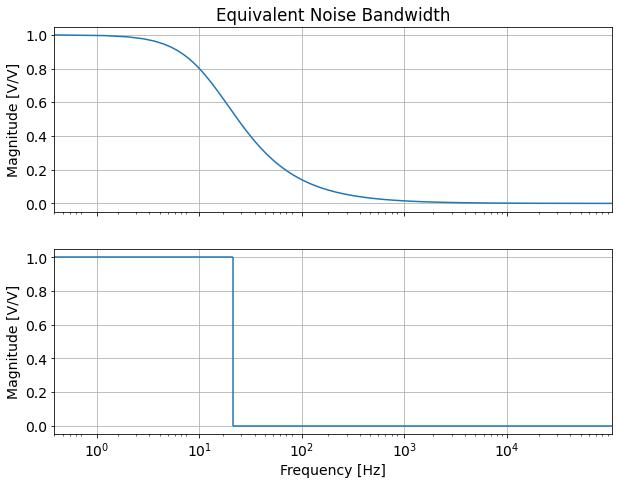

In [9]:
f = np.arange(.5, 1e5+.5 , step=1)
w = 2*np.pi*f
R = 10e3
C = 1e-6
tau = R*C
RC_mag = 1/np.sqrt(1+(w*tau)**2)
f_enb = np.sum(RC_mag**2)

plot_noise_bandwidth(f, RC_mag)

## Thermal noise amplitude

- The amplitude of thermal noise at any given instant is unpredictable, but follows a Gaussian distribution

- If we integrate the probability density function over the range $-3\sigma_{v_n}$ to $3\sigma_{v_n}$, the probability of the instantaneous voltage being in that range would be 99.73%

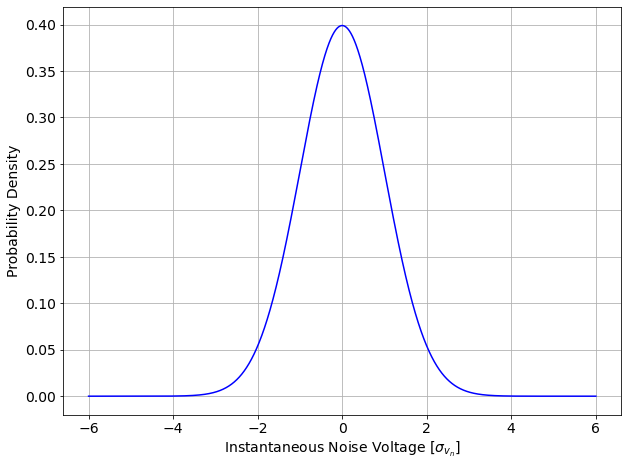

In [22]:
R = 10e3
C = 1e-9 
vn_rms = np.sqrt(k*T/C)
vn_range = np.linspace(-6*vn_rms, 6*vn_rms, 10000) 
vn_ampl = (1/np.sqrt(2*np.pi))*np.exp(-np.power(vn_range,2)/2/vn_rms**2)
plot_xy(vn_range/vn_rms, vn_ampl, r'Instantaneous Noise Voltage [$\sigma_{v_n}$]',
       'Probability Density')

## Noise as a function of time

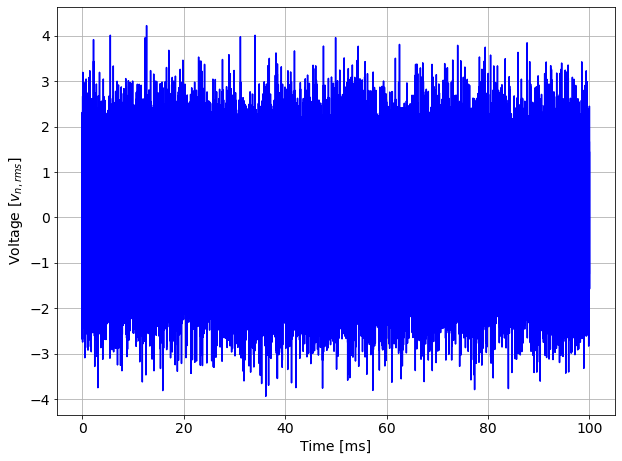

In [21]:
vn_rms = 1e-6                                     # rms noise value (standard deviation)
fenb = 500e3                                      # 500kHz noise bandwidth
N = 100e-3*fenb*2                                 # N noise samples   
t = np.arange(N) / fenb / 2                       # sample at exactly 2x the noise bandwidth
vn_t = np.random.normal(0, vn_rms, size=t.shape)  # random sequence with a Gaussian distribution
plot_xy(1e3*t, vn_t/vn_rms, 'Time [ms]', r'Voltage [$v_{n,rms}$]')

In [12]:
print('The standard deviation is', np.round(np.std(vn_t),9)) 

The standard deviation is 1e-06


- The percentage occurence of a given range of noise values approaches the probability density function

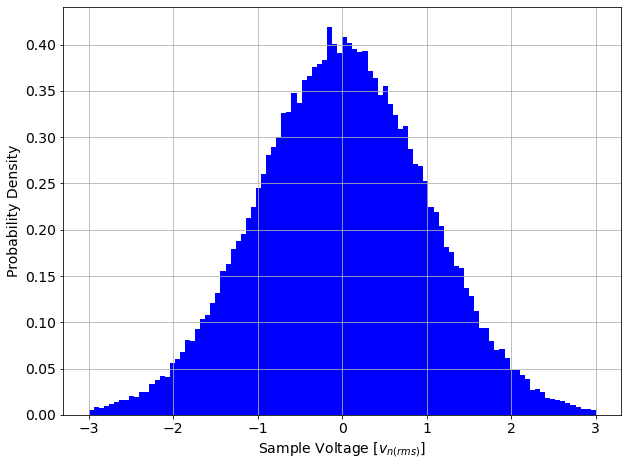

In [13]:
noise_hist(vn_t, vn_rms, 100)

## White noise spectral density

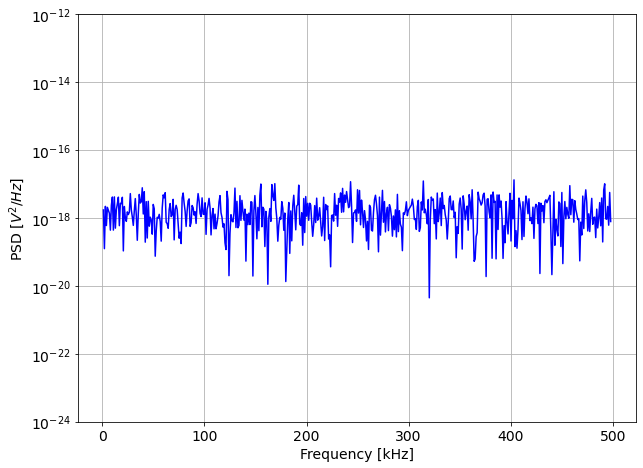

In [14]:
fenb = 500e3
freq_bin = 2*fenb/N
nfft = 2**10
f, en_in_psd = signal.periodogram(vn_t, fenb*2, nfft=nfft)
vn_rms_psd = np.sqrt(np.sum(en_in_psd)*2*fenb/nfft)
plot_xlogy(1e-3*f[1:-2], en_in_psd[1:-2], 'Frequency [kHz]', r'PSD [$V^2/Hz$]', 1e-24, 1e-12)

In [15]:
print('The rms noise from the PSD is', np.round(vn_rms_psd,9))

The rms noise from the PSD is 1.009e-06


In [27]:
np.sqrt(np.mean(en_in_psd)*500e3)

1.0075414703230192e-06

## Shot noise

 - Define $N$ as the number of charge carriers passing a point in a time interval $\tau$ at a rate $n(t)$. Then

\begin{equation}
N = \int_0^\tau n(t) dt
\end{equation}

\begin{equation}
\overline{N} = \overline{n}\tau
\end{equation}

 - where $\overline{N}$ and $\overline{n}$ are ensemble averages. Let $\delta N = N - \overline{N}$ be the fluctuation in the number of carriers passing through during in an interval $\tau$ 
 
 - Let's also define the random process $x_\tau$ such that $x_\tau = \delta N/\tau$
 
 - For a **Poisson process**, $\overline{N} = \text{Var}(N) = \overline{[\delta N]^2}$ and $\overline{n} = \text{Var}(n)$, thus
 
\begin{equation}
\text{Var}(n) = \tau \overline{x_\tau^2}
\end{equation}
 

 - Applying the Wiener-Khinchin theorem gives
 
\begin{equation}
S_{nn}(0) = \lim_{\tau\to\infty} 2\tau \overline{x_\tau^2} = 2\text{Var}(n) = 2\overline{n}
\end{equation}

 - where the $(0)$ indicates invariance of the spectral density with frequency. To get mean current from mean carrier flux, multiply by the carrier charge $q$ 
 
\begin{equation}
\overline{I} = q \overline{n}
\end{equation}

 - The spectral density of the current fluctuation is thus

\begin{equation}
S_{II}(0) = q^2 S_{nn}(0) = 2q^2\text{Var}(n) = 2q^2\overline{n} = \boxed{2q\overline{I}}
\end{equation}

## Shot noise in a pn junction

<center><img src="img/shot_noise.png" width=900 /></center>

 - The current in a forward-biased $pn$ junction is given by
 
$$I_D = I_S(e^{\frac{V_{D}}{V_T}} - 1) $$

 - The shot noise mean square current density is given by
 
$$ i_{sh}^2 = 2qI_D\Delta f $$

 - $r_d = kT/qI_D$ is the small-signal resistance of the $pn$ junction, and is considered to be noiseless 
 
 - Note that unlike thermal noise in resistors, shot noise in $pn$-junctions *only exists in the presence of DC current flow*
 - Like thermal noise, shot noise exhibits a Gaussian amplitude distribution

## Diode noise model

<center><img src="img/diode_noise.png" width=700 /></center>

 - The complete diode noise model includes thermal noise due to the finite resistivity of the semiconductor material comprising the diode
 
 - Because $r_s$ is a real resistance (typically small, from 10's to 100's of $\Omega$), its noise spectral density is given by
 
$$ e_s = \sqrt{4kTr_s} $$

 - Note that although $r_d$ is represented as a small-signal resistance, it is not a real resistor and therefore *does not* exhibit thermal noise itself (typical for many *small-signal* resistances)

## 1/f noise

 - The principal feature of $1/f$ noise is a spectral density $S_{xx}(f)$ that increases with decreasing frequency $f$ with no observed leveling off 
 
 - $1/f$ noise arises in devices due to a variety of factors, though in electronic devices it is typically attributed to the existence of "energy traps" that arise due to material imperfections (often at the interface between different materials) 
 
 - In some cases, the fundamental physical principles that give rise to a specific $1/f$ noise process may be unknown
 
 - In general, $1/f$ noise has a spectral density that varies as $1/f^\gamma$, with $\gamma$ typically exhibiting values between $0.8$ and $1.2$ (although values outside this range are not uncommon) 
 
 - The $1/f^\gamma$ noise characteristic, with spectral density increasing with decreasing frequency, has been experimentally observed to continue down to frequencies as low as $0.5 \mu\text{Hz}$ (approximately one cycle per day)


## Spectral density of 1/f noise

 - If we denote $f_1$ and $f_2$ as the minimum and maximum frequencies of interest for a given application or measurement system and assume that the spectral density is zero outside this range, assuming a noise coefficient $C_{1/f}$ we have
    
\begin{equation}
S_x(f) = 
\begin{cases} 
C_{1/f}f^{-1}, & \: f_1 < f < f_2 \\
0, & f < f_1; f > f_2 
\end{cases}
\end{equation}

 - In this case, the variance of the noise (determined by integrating $S_x(f)$ from $f_1$ to $f_2$) is given by

\begin{equation}
\sigma_x^2 = \langle (\delta x)^2 \rangle = C_{1/f}\ln\dfrac{f_2}{f_1}
\end{equation}

 - In most cases, $1/f$ noise is only of interest up to the frequency at which another source of noise (e.g. thermal or shot noise) begins to dominate the total noise, so it makes sense to model the noise this way
 
 - The logarithmic dependence of the variance on the frequency span means that it grows *very* slowly with measurement time, practically limiting the magnitude (i.e., variance) of $1/f$ noise

 - The power spectral density grows inversely with frequency at $20 \: \text{dB}/\text{dec}$, while the voltage spectral density grows at $10 \: \text{dB}/\text{dec}$

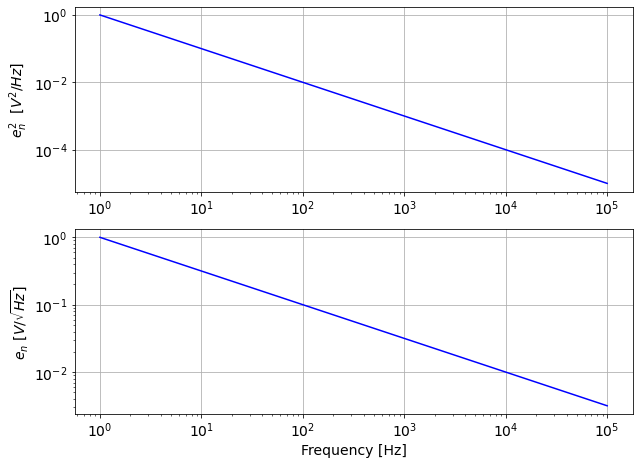

In [16]:
f = np.logspace(0,5,num=300)      # 0.1Hz to 1MHz
s_x_1_over_f = 1/f                # spectral density
plot_loglog2(f, s_x_1_over_f, f, np.sqrt(s_x_1_over_f), 'Frequency [Hz]', r'$e_n^2$  [$V^2/Hz$]', 
            'Frequency [Hz]', r'$e_n$ [$V/\sqrt{Hz}$]');

## 1/f noise "corner"

 - The $1/f$ noise of a given circuit or device is often described by its "corner" frequency $f_c$, the frequency at which $1/f$ and white noise contributions to the total noise are equal 

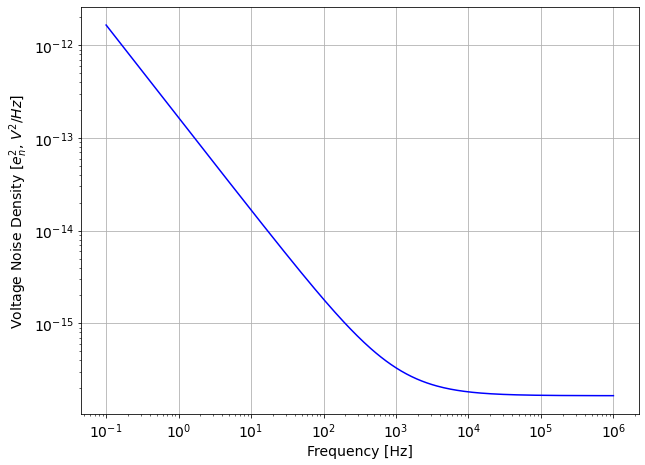

In [29]:
f = np.logspace(-1,6,num=300)      # 0.1Hz to 1MHz
R = 10e3                           # 10k-ohm resistance
f_c = 1000                         # 1kHz corner frequency
e_n_w = np.sqrt(4*k*T*R)           # white noise voltage density
e_n_2_tot = e_n_w**2*(1+f_c/f)   # total noise voltage density
plot_loglog(f, e_n_2_tot, 'Frequency [Hz]', 'Voltage Noise Density [$e_n^2$, $V^2/Hz$]')

## RMS noise versus bandwidth

 - For applications requiring high precision at very low frequencies, $1/f$ noise can have a substantial impact
 
 - Let's take a look at both noise density ($e_n$) and $rms$ noise ($v_{n,rms}$) with and without $1/f$ noise

In [38]:
f = np.logspace(-3,5,num=1000)          # 1mHz to 100kHz
T = 300                                 # absolute (room) temperature
R = 10e3                                # 10k-ohm resistance
f_c = 100                               # flicker noise corner 
e_n_w_2 = 4*k*T*R                       # white noise power spectral density
e_n_w = np.sqrt(e_n_w_2)                # white noise voltage spectral density
e_n_tot_2 = e_n_w_2*(1+f_c/f)           # power spectral density, including 1/f contribution
e_n_tot = np.sqrt(e_n_tot_2)            # voltage spectral density
vn2 = integrate.cumtrapz(e_n_tot_2, f, initial=0) # integrated noise power as a function of bandwidth
vn_rms = np.sqrt(vn2)                   # rms noise as a function of bandwidth
vn_w_2 = integrate.cumtrapz(e_n_w_2*np.ones(np.shape(f)), f, initial=0) # integrated white noise power
vn_w_rms = np.sqrt(vn_w_2)              # rms noise without 1/f

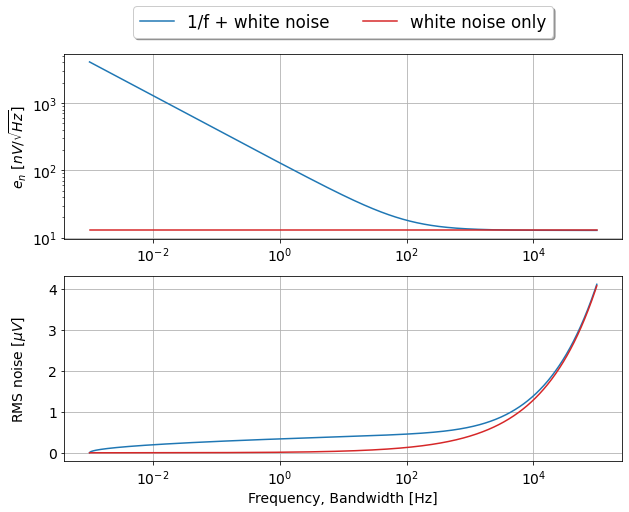

In [39]:
plot_flicker_vs_white_noise(f, e_n_tot, e_n_w, vn_rms, vn_w_rms) 

 - Note that for wider measurement bandwidths the $rms$ noise is approximately the same with (blue curve) and without (red curve) $1/f$ noise, but for narrow bandwidths $1/f$ noise dominates
 
 - What constitutes a "wide" or "narrow" bandwidth depends on both the thermal noise floor and the corner frequency
 
 - All transistors exhibit some amount of flicker noise, but FETs typically exhibit much higher levels of $1/f$ noise (and higher corner frequencies) than BJTs

## Summary

 - Noise is a random process that must be analyzed using statistical means
 
 - Many noise processes obey Gaussian distributions, and are typically, and conveniently, described using mean $\mu_x$, variance $\sigma_x^2$, and autocorrelation $R_{xx}(\tau)$
 
 - Spectral density describes the power (or voltage, current) present in a signal, per unit frequency, as a function of frequency
 
 - The most important types of noise in electronic devices are thermal noise, shot noise, and $1/f$ noise
 
    - Thermal noise is white and does not dependent on steady state (DC) current
    
    - Shot noise is also white, but relies on the presence of DC current
    
    - $1/f$ noise exhibits a power spectral density that is inversely proportional to frequency

